# nmi | spring 2024
## special lecture 04 : neural networks, briefly


### 2 multi-layer perceptron (MLP)


its a perceptron with a hidden layer or many, surprise.
</br></br>


##### example


\begin{align}
  \text{network} \quad &\left\{ \begin{array} &
    \text{input} & \text{2D: } x_1,x_2 \\
    \text{hidden layer} & \text{2 neurons with ReLU activation function, } f(z) = max(0,z) \\
    \text{output layer} & \text{1 neuron with sigmoid activation function, } g(z) = \sigma(z) = 1/(1-e^{-z})
  \end{array} \right. \\
  \\
  &\text{loss function: binary cross-entropy, } L = -[\,y\, log(\hat{y}) + (1-y)\, log\, (1-\hat{y})\,]
\end{align}
</br>


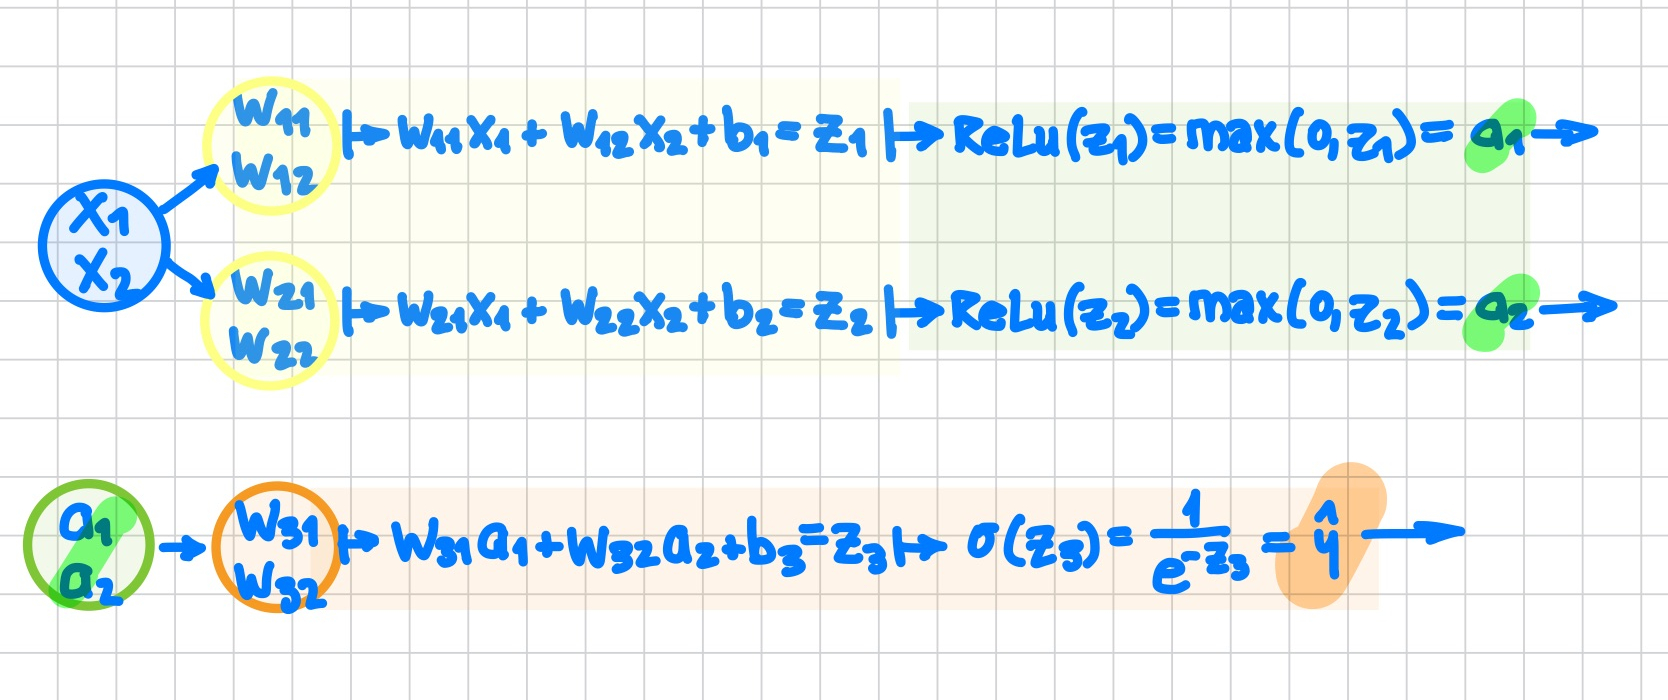

1. forward pass.
</br>

* input $\rightarrow$ hidden layer.

\begin{align}
  z_1 &= w_{11}x_1 + w_{12}x_2 + b_1 \mapsto \phi_{ReLU}(z_1) = max(0,z_1) = a_1 \\
  z_2 &= w_{21}x_1 + w_{22}x_2 + b_2 \mapsto \phi_{ReLU}(z_2) = max(0,z_2) = a_2 \\
\end{align}
</br>

* hidden layer $\rightarrow$ output

$$z_3 = w_{31}a_1 + w_{32}a_2 + b_3 \mapsto \sigma(z_3) = \frac{1}{1+e^{-z_3}} = \hat{y}$$
</br>

* loss calculation

$$L_{\text{binary cross-entropy}} = -[\,y\, log(\hat{y}) + (1-y)\, log\, (1-\hat{y})\,]$$


2. backward pass (backpropagation)
</br>

* output layer gradients
</br>

\begin{align}
  \frac{\partial L}{\partial z_3} = \hat{y} - y \quad\Rightarrow\quad
    \frac{\partial L}{\partial w_{31}} &= \frac{\partial L}{\partial z_3} \cdot a_1 \\
    \frac{\partial L}{\partial w_{32}} &= \frac{\partial L}{\partial z_3} \cdot a_2 \\
    \frac{\partial L}{\partial b_3} &= \frac{\partial L}{\partial z_3}
\end{align}
</br>

* hidden layer gradients
</br>

\begin{align}
  \frac{\partial L}{\partial a_1} = \frac{\partial L}{\partial z_3}\cdot w_{31} \quad\Rightarrow\quad
    \frac{\partial L}{\partial w_{11}} &= \frac{\partial L}{\partial a_1} \cdot \frac{\partial a_1}{\partial z_1} \cdot x_1 \\
    \frac{\partial L}{\partial w_{21}} &= \frac{\partial L}{\partial a_2} \cdot \frac{\partial a_2}{\partial z_2} \cdot x_1 \\
    \frac{\partial L}{\partial b_1} &= \frac{\partial L}{\partial a_1} \cdot \frac{\partial a_1}{\partial z_1} \\
    \\
  \frac{\partial L}{\partial a_2} = \frac{\partial L}{\partial z_3}\cdot w_{32} \quad\Rightarrow\quad
    \frac{\partial L}{\partial w_{12}} &= \frac{\partial L}{\partial a_1} \cdot \frac{\partial a_1}{\partial z_1} \cdot x_2 \\
    \frac{\partial L}{\partial w_{22}} &= \frac{\partial L}{\partial a_2} \cdot \frac{\partial a_2}{\partial z_2} \cdot x_2 \\
    \frac{\partial L}{\partial b_2} &= \frac{\partial L}{\partial a_2} \cdot \frac{\partial a_2}{\partial z_2}
\end{align}
</br>


repeat until model converges to a state where the loss is minimized or a criterion is met.
</br>


##### example, XOR


###### code


In [12]:
import numpy as np

class MLP:
  """
  This class implements a simple Multi-Layer Perceptron (MLP) with one hidden layer.
  """
  def __init__(self, input_size, hidden_size, output_size, learning_rate):
    """
    Initializes the MLP with random weights and biases.

    Args:
        input_size: The number of features in the input data.
        hidden_size: The number of neurons in the hidden layer.
        output_size: The number of neurons in the output layer (number of classes).
        learning_rate: The learning rate for updating weights during training.
    """
    # Initialize weights and biases with random values
    self.weights1 = np.random.rand(input_size, hidden_size)
    self.biases1 = np.random.rand(hidden_size)
    self.weights2 = np.random.rand(hidden_size, output_size)
    self.biases2 = np.random.rand(output_size)
    self.learning_rate = learning_rate

  def sigmoid(self, x):
    """
    Sigmoid activation function.

    Args:
        x: The input value.

    Returns:
        The sigmoid activation of x.
    """
    return 1 / (1 + np.exp(-x))

  def predict(self, X):
    """
    Performs forward pass to predict outputs for a given input.

    Args:
        X: The input data (a numpy array with each row representing a sample).

    Returns:
        The predicted outputs for the input data.
    """
    # Forward pass through hidden layer
    hidden_layer_activation = self.sigmoid(np.dot(X, self.weights1) + self.biases1)
    # Forward pass through output layer
    output_layer_activation = self.sigmoid(np.dot(hidden_layer_activation, self.weights2) + self.biases2)
    return output_layer_activation

  def train(self, X, y):
    """
    Trains the MLP using backpropagation.

    Args:
        X: The training data (a numpy array with each row representing a sample).
        y: The training labels (a numpy array with labels for each sample).
    """
    # Forward pass
    print(X,self.weights1,np.dot(X, self.weights1))
    hidden_layer_activation = self.sigmoid(np.dot(X, self.weights1) + self.biases1)
    output_layer_activation = self.sigmoid(np.dot(hidden_layer_activation, self.weights2) + self.biases2)

    # Backpropagation
    # Calculate errors
    output_error = output_layer_activation - y
    hidden_error = np.dot(output_error, self.weights2) \
        * (1 - hidden_layer_activation) * (hidden_layer_activation)

    # Update weights and biases
    print(self.learning_rate * np.dot(hidden_layer_activation, output_error))
    print(self.weights2)
    self.weights2 -= self.learning_rate * np.dot(hidden_layer_activation, output_error)
    self.biases2 -= self.learning_rate * output_error.sum(axis=0)
    self.weights1 -= self.learning_rate * np.dot(X.T, hidden_error)
    self.biases1 -= self.learning_rate * hidden_error.sum(axis=0)

# Example usage
mlp = MLP(2, 4, 1, 0.1)  # 2 input features, 4 hidden neurons, 1 output neuron, learning rate 0.1
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Sample input data
y = np.array([0, 1, 1, 0])  # Sample labels (binary classification)

# Train the network for some epochs
for epoch in range(1):
  mlp.train(X, y)

# Make predictions on new data
new_data = np.array([[0.5, 0.8]])
prediction = mlp.predict(new_data)
print(f"Predicted output for new data: {prediction}")


[[0 0]
 [0 1]
 [1 0]
 [1 1]] [[0.05483405 0.87943442 0.12506764 0.45016645]
 [0.28253277 0.33061542 0.1433557  0.2386708 ]] [[0.         0.         0.         0.        ]
 [0.28253277 0.33061542 0.1433557  0.2386708 ]
 [0.05483405 0.87943442 0.12506764 0.45016645]
 [0.33736682 1.21004984 0.26842334 0.68883726]]
[[ 0.22158357 -0.04608053 -0.04608053  0.22158357]
 [ 0.23893579 -0.04977113 -0.04977113  0.23893579]
 [ 0.24516256 -0.05091481 -0.05091481  0.24516256]
 [ 0.25922109 -0.05392622 -0.05392622  0.25922109]]
[[0.42199556]
 [0.85115066]
 [0.53976819]
 [0.1029182 ]]


ValueError: non-broadcastable output operand with shape (4,1) doesn't match the broadcast shape (4,4)

* roi yehoshua [@tds](https://towardsdatascience.com/multi-layer-perceptrons-8d76972afa2b)
* sarada anoushka [@niser](https://www.niser.ac.in/~smishra/teach/cs460/2020/lectures/lec19/)
* mike koby [@kaggle](https://www.kaggle.com/code/kobymike2020/solving-xor-problem-with-sklearn-mlp/notebook)
* victor lavrenko [@youtube](https://www.youtube.com/watch?v=kNPGXgzxoHw)
</br>


#### 2.1 universal approximation theorem


One of the remarkable facts about MLPs is that they can compute any arbitrary function (even though each neuron in the network computes a very simple function such as the step function).

The [universal approximation theorem](https://en.wikipedia.org/wiki/Universal_approximation_theorem) states that an MLP with one hidden layer (with a sufficient number of neurons) can approximate any continuous function of the inputs arbitrarily well. With two hidden layers, it can even approximate discontinuous functions. This means that even very simple network architectures can be extremely powerful.

Unfortunately, the proof of the theorem is non-constructive, i.e., it does not tell us how to build a network to compute a specific function but only shows that such a network exists.

### und so weiter
